In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Data Preprocessing
# Read the dataset
data = pd.read_csv("../Datasets/ETL_Completed_LoanApprovalPrediction.csv")

In [3]:
# Step 2: Splitting the Data
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 3: Building the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [5]:
# Step 4: Training the Model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Step 5: Evaluating the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy:.4f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


Random Forest Model Accuracy: 0.8713

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71        25
           1       0.89      0.95      0.92        76

    accuracy                           0.87       101
   macro avg       0.84      0.79      0.81       101
weighted avg       0.87      0.87      0.87       101


Confusion Matrix:
[[16  9]
 [ 4 72]]


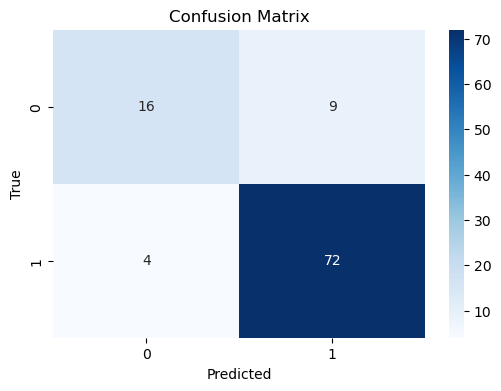

In [15]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



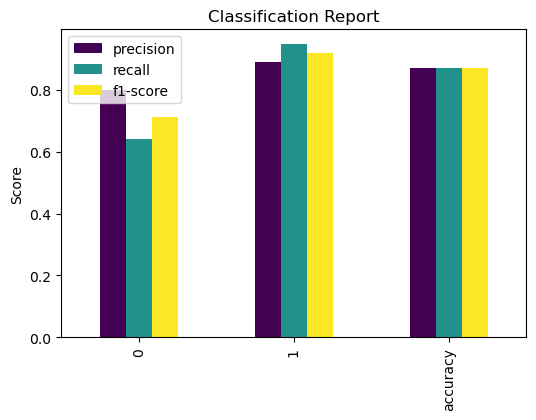

In [8]:
# Plot the classification report using a bar chart (excluding "macro avg" and "weighted avg")
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df = class_report_df.drop(index=['macro avg', 'weighted avg'])
class_report_df = class_report_df[['precision', 'recall', 'f1-score']]
class_report_df.plot(kind='bar', colormap='viridis', figsize=(6, 4))
plt.ylabel('Score')
plt.title('Classification Report')
plt.show()

In [9]:
# Define categorical columns for user input
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']


In [12]:
# Step 5: Taking User Data Input
print("Please enter the following details for loan eligibility prediction:")
user_data = {}
for col in X.columns:
    user_input = input(f"{col}: ")
    user_data[col] = [user_input]

user_df = pd.DataFrame(user_data)

# Convert categorical variables into numerical using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    user_df[col] = label_encoder.fit_transform(user_df[col])

# Ensure the columns in user_df match the columns in X_train
missing_cols = set(X_train.columns) - set(user_df.columns)
for col in missing_cols:
    user_df[col] = 0

user_df = user_df[X_train.columns]  # Reorder the columns to match X_train

# Step 6: Predicting Loan Eligibility for User Input
user_pred = rf_model.predict(user_df)

if user_pred[0] == 1:
    print("Congratulations! Your loan application is APPROVED.")
else:
    print("We regret to inform you that your loan application is DENIED.")

Please enter the following details for loan eligibility prediction:
